C:\
One Class Surrounding another Class. Bidimensional.
100 batches of 525 instances



METHOD: Static lp as classifier
Execution time:  1.4326837727840185
Average MCC:  0.020488158636708692
Average error: 35.88539999999999
Average macro-F1: 0.4669697990299617
Average micro-F1: 0.6409000000000001
Acurácia Média:  64.11460000000001
Desvio Padrão:  12.89891184712881
Variância:  166.38192683999998


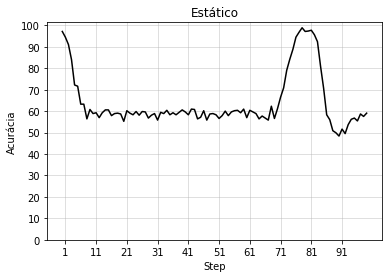

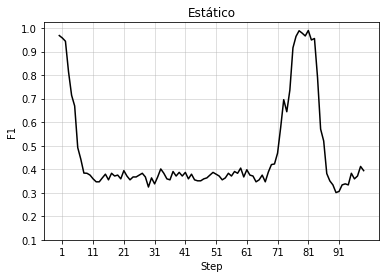




METHOD: Sliding lp as classifier
Execution time:  0.7500940813646739
Average MCC:  0.8161203609030762
Average error: 10.706800000000015
Average macro-F1: 0.8846837168181277
Average micro-F1: 0.8963999999999999
Acurácia Média:  89.29319999999998
Desvio Padrão:  16.476325553957714
Variância:  271.46930376


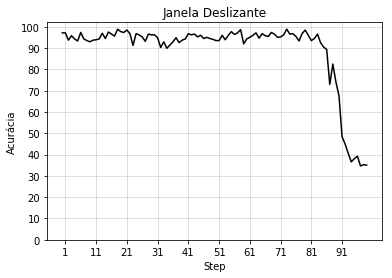

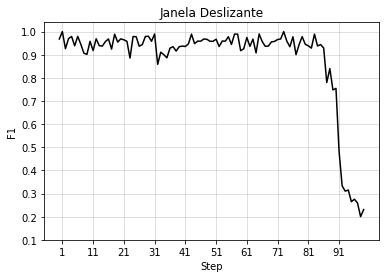




METHOD: Incremental lp as classifier
Execution time:  14.467188152154915
Average MCC:  0.016552897876937093
Average error: 35.9216
Average macro-F1: 0.4658228277167638
Average micro-F1: 0.6401
Acurácia Média:  64.0784
Desvio Padrão:  12.583962469746961
Variância:  158.35611144000003


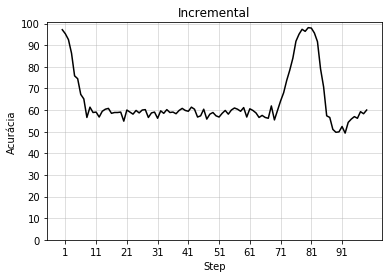

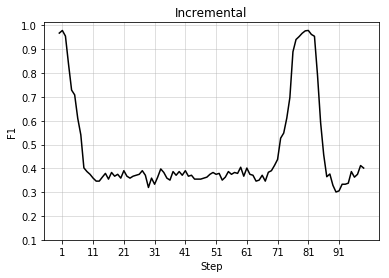




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  2.214439265736157
Average MCC:  0.9201141253626713
Average error: 4.4298
Average macro-F1: 0.9587186760295126
Average micro-F1: 0.9611
Acurácia Média:  95.5702
Desvio Padrão:  3.9722416794550655
Variância:  15.77870396


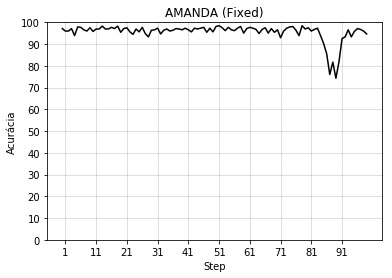

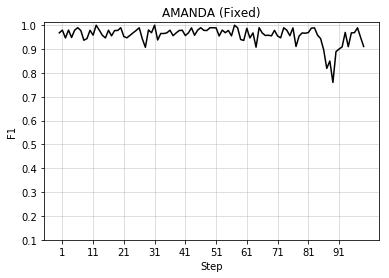




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.39 | Std keeping percentage=0.15
Execution time:  2.350635492404759
Average MCC:  0.7546029363342204
Average error: 12.493899999999996
Average macro-F1: 0.8752556576883055
Average micro-F1: 0.8809000000000001
Acurácia Média:  87.5061
Desvio Padrão:  22.475838177696513
Variância:  505.1633017900001


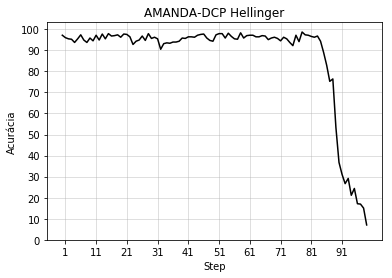

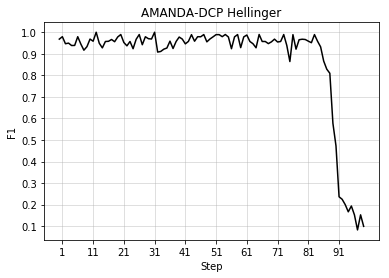




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.30 | Std keeping percentage=0.05
Execution time:  2.3395248720026913
Average MCC:  0.7466569113567826
Average error: 13.101899999999986
Average macro-F1: 0.8717714704446229
Average micro-F1: 0.8748000000000001
Acurácia Média:  86.89810000000001
Desvio Padrão:  25.78869216129426
Variância:  665.0566433900001


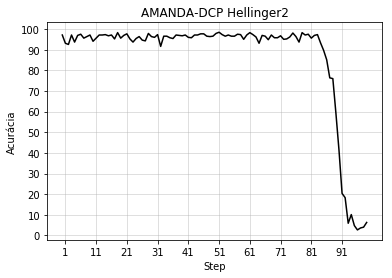

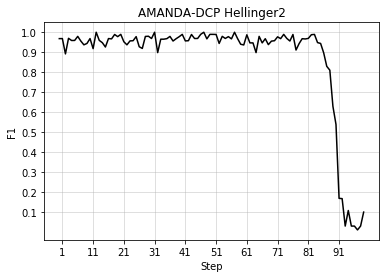




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.21 | Std keeping percentage=0.09
Execution time:  2.2700340434584376
Average MCC:  0.7264995789396691
Average error: 13.888000000000005
Average macro-F1: 0.8613204128206415
Average micro-F1: 0.8652
Acurácia Média:  86.112
Desvio Padrão:  26.74828308508791
Variância:  715.470648


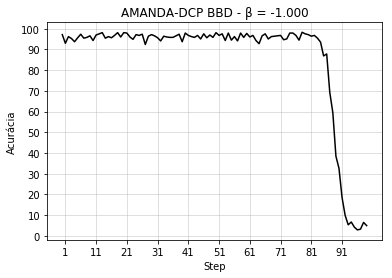

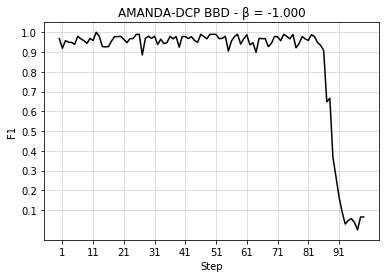

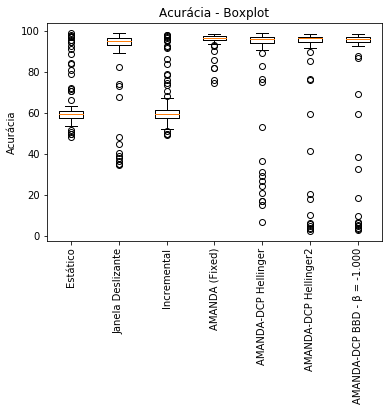

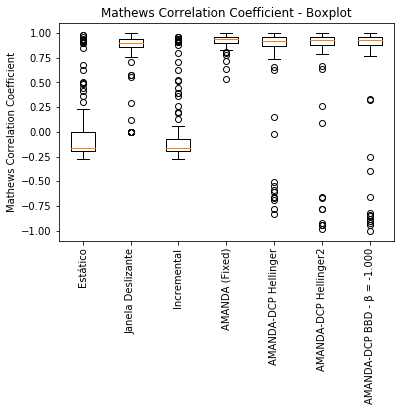

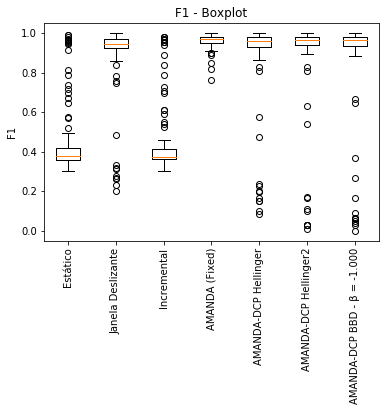

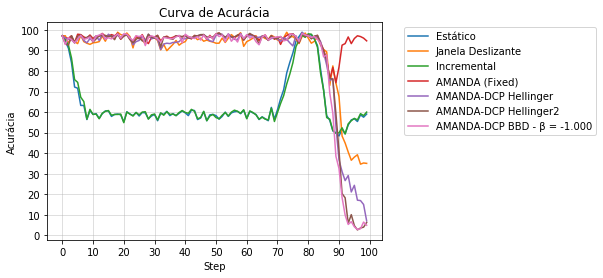

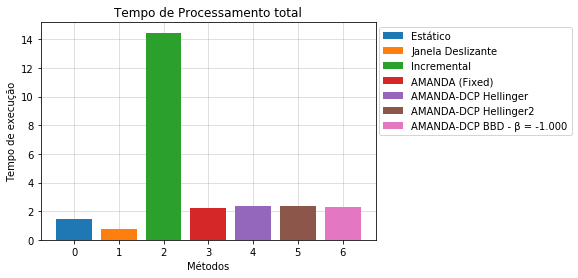

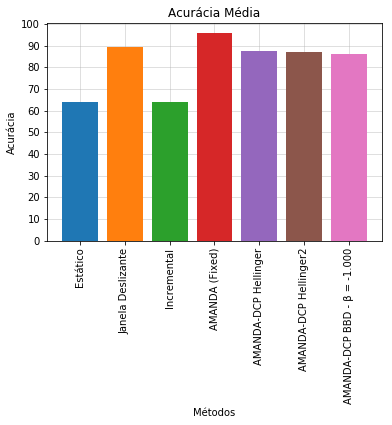

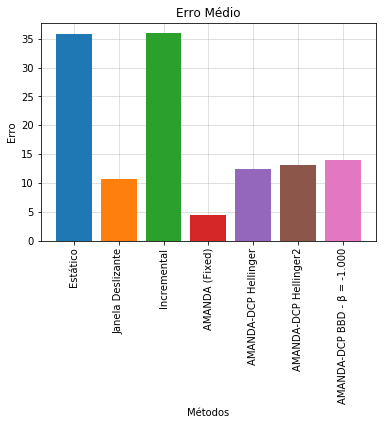

Pos 2 - Redução do Erro (Janela Deslizante):39.27124243152102
Pos 7 - Redução do Erro (Incremental):-0.05646139880777233
Pos 1 - Redução do Erro (AMANDA (Fixed)):49.06152420821464
Pos 3 - Redução do Erro (AMANDA-DCP Hellinger):36.48388978485398
Pos 4 - Redução do Erro (AMANDA-DCP Hellinger2):35.53558783802753
Pos 5 - Redução do Erro (AMANDA-DCP BBD - β = -1.000):34.30950204789546


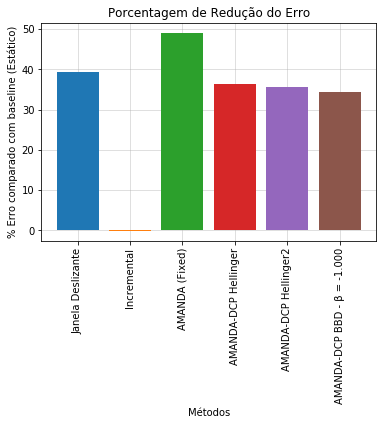

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])
print(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
#from methods import prequential_amanda_fixed
#from methods import prequential_amanda_dynamic
#from methods import prequential_static_classifier
#from methods import prequential_deslizante_LN
#from methods import prequential_incremental_LN
#from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    # sgd=sthocatic gradient descent, lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    sslClassifier = 'lp'
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    plot_animation = False
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCSurr(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.7, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1]
    bestK = [5]

    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
     # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'HDDDM')


    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 11, 0.7)

    
    #prequential evaluation
    '''
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 7, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 7, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 7, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 7, 0.75, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 11, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 11, 0.7)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CSurr', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    '''
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, plot_animation, externalResults)
    

if __name__ == "__main__":
    main()